In [1]:
import numpy as np
import pandas as pd
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
import spacy
from spacy import displacy
from cleantext import clean

# Lemmatizing libraries
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk.corpus import stopwords
nltk.download('stopwords');


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/william/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[how to get latest file](https://stackoverflow.com/questions/39327032/how-to-get-the-latest-file-in-a-folder)

In [2]:
list_of_files = glob.glob('./scitech_data_scraped/*.csv') #
latest_file = max(list_of_files, key=os.path.getctime)

In [3]:
sci_tech_data = pd.read_csv(latest_file)

/Users/william/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (17,21,34,63,68,112) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Below I drop duplicate rows.

In [4]:
sci_tech_data.drop_duplicates(subset = ['selftext','title'], inplace=True)

Below I select the relevent rows that have tech or science as the subreddits and save the feature space, 'title' and the target, 'subreddit' to respective variables.

In [5]:
sci_tech_data['subreddit_name_prefixed'].value_counts()

r/technology              6692
r/science                 3165
u/MEGA-Technology          193
u/Ok-Technology-1912       142
u/Candid-Science-7189      132
u/Gold-Science-2230         94
u/Away-Technology-4883      63
u/Any-Technology-9975       61
u/Dazzling-Science-652      34
u/AVID-Technology           30
u/Content-Technology-7      19
u/Bugd-Technology            7
u/kretoss-technology         5
u/SecureAge-Technology       4
u/Thin-Science-6996          3
u/OV-Technology              3
u/Slow-Technology-9949       3
u/Ok-Science-1826            2
u/FS-Technology              2
u/A-science-enthusiast       2
u/Efficient-Science-80       1
u/Ok-Science-9480            1
u/No-Technology-2687         1
u/Jaded-Technology-332       1
u/more-technology-00         1
u/Dear-Technology-6015       1
u/Then-Technology-9558       1
u/MR-Technology              1
u/Fearless-Science-103       1
u/Worth-Science-4441         1
u/awesome-technology         1
u/visimens-technology        1
u/Fearle

In [6]:
subreddit = sci_tech_data.loc[(sci_tech_data['subreddit'].isin(
                                ['technology','science']), 'subreddit')]
title = sci_tech_data.loc[(sci_tech_data['subreddit'].isin(
                                ['technology','science']),'title')]

In [7]:
X = title
y = subreddit

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

[source: strip characters from string in series](https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column)
[source: remove punctuation](https://www.google.com/search?q=how+to+replace+punctuation+with+regular+expression+python&rlz=1C5CHFA_enUS983US983&oq=how+to+replace+punctuation+with+regular&aqs=chrome.1.69i57j33i160l2.10574j0j7&sourceid=chrome&ie=UTF-8#kpvalbx=_7SabY4OANaSs0PEP042roAM_32)

Get rid of puctuation

[remove stop words](https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe)

In [9]:
stop_words = stopwords.words('english')
stop_words;

In [10]:
# replace "-" w/ 'hyphen', then remove emojis, punctuation, digits, and urls
# while keeping an indicator or url usage.

X_train_filtered = X_train.map(lambda x: clean(
                            re.sub('-',repl=' hyphen ', string = x) , no_emoji=True,
                                no_punct=True,no_digits=True, no_urls=True))

# remove leftovers from the 'clean' function  

X_train_filtered = X_train_filtered.map(lambda x: re.sub('(0|\|)',
                                                    repl='',string = x))
#replacing hyphen with '-'
X_train_filtered = X_train_filtered.map(lambda x: re.sub('hyphen',repl='-', string = x))
# remove stop words   
X_train_filtered = X_train_filtered.map(lambda x: ' '.join([word for word 
                                          in x.split() if word not in 
                                          stop_words]))

print((sum([len(s) for s in X_train])-sum([len(s) for s in X_train_filtered]))
    /sum([len(s) for s in X_train])
)

# I'll keep (<url>) group in the words, in case there is differential frequency

0.22357637818276238


###### **Lemmatization** -- [sources](https://www.machinelearningplus.com/nlp/lemmatization-examples-python/)

In [11]:
lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/william/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

[Lemmatizing w/ POS](https://www.machinelearningplus.com/nlp/lemmatization-examples-python/)

In [12]:
# Lemmatize with POS Tag

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

To-do/idea: get POS counts [source](https://stackoverflow.com/questions/20960777/python-how-to-count-pos-tags-from-from-a-sentence)

In [13]:
lemmatizer = WordNetLemmatizer()

X_train_lemmatized = []
for title in X_train_filtered:
    X_train_lemmatized.append(' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for \
                               w in nltk.word_tokenize(title)]))
X_train_lemmatized;

In [14]:
X_train_lemmatized = pd.Series(data = X_train_lemmatized, index = X_train_filtered.index)

In [15]:
X_train_lemmatized

2743            prove point + - karma nothing quality post
38        researcher identify origin serious illness child
2154     way science go level human need - think ai take u
6283     former amazon exec reportedly paid $ run jeff ...
4832     iphone pro max gb alpine green - unlocked rene...
                               ...                        
2143     supergps technology accurately pinpoint positi...
9685                  email scrap legal - resistancephlcom
6919     amazon ceo prime video attractive economics pa...
10362               possible native payment system twitter
1536     new study base foi request page found coca - c...
Length: 7392, dtype: object

In [16]:
# back to DataFrame
df = pd.DataFrame(X_train_lemmatized, columns = ['title']).join(pd.DataFrame(y_train))

In [17]:
df.index = range(df.shape[0])

###### With words lemmatized and english stop words removed I will proceed with EDA

Below I will inspect various distributions of title statistics after adding the statistics to the dataframe.

In [18]:
df['title_length'] = [len(df.loc[i,'title']) for i in range(len(df['title']))]

In [19]:
df['title_word_count'] = [len(df.loc[i,'title'].split(' ')) for i in range(len(df['title']))]

In [20]:
df['max_word_length'] = [max(map(len, title.split(' '))) \
                         for title in df['title']] 

In [21]:
df['avg_word_length'] = df['title_length']/df['title_word_count']

In [22]:
df['subreddit_indicator']=[1 if sub == 'technology' else 0 for sub in df['subreddit']]

In [23]:
import seaborn as sns

[Text(0.5, 1.0, 'Distribution of title word counts by subreddit')]

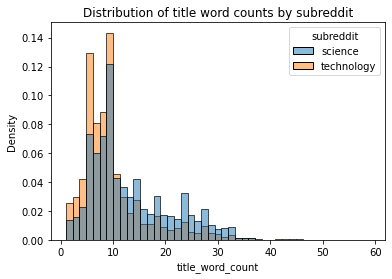

In [24]:
sns.histplot(data = df, x = 'title_word_count', hue = 'subreddit', stat='density', common_norm = False, bins = 45).set(title = 'Distribution of title word counts by subreddit')

Above we can see that shorter titles have a better chance of having been posted to technology, while longer titles are more likely from science even after accounting for baseline frequencies.

Above we see that there are many posts between 0 and 20 words long with a 

[Text(0.5, 1.0, 'Distribution of title character length by subreddit')]

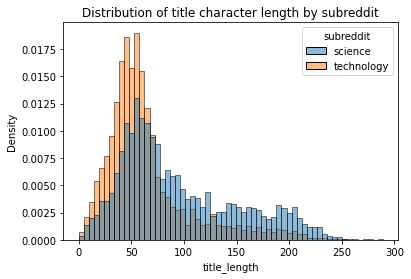

In [25]:
sns.histplot(data = df, x = 'title_length', hue = 'subreddit', stat='density', common_norm = False).set(title = 'Distribution of title character length by subreddit')

Above we see that generally title character lengths under around 80 are more likely to have been from technology, and above 80 from science.

[Text(0.5, 1.0, 'Distribution of title word counts by subreddit'), (4.0, 11.0)]

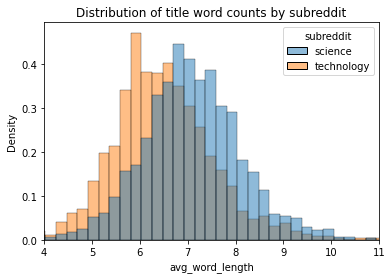

In [26]:
sns.histplot(data = df, x = 'avg_word_length', hue = 'subreddit', 
             stat='density', bins = 100, common_norm = False).set(
    title = 'Distribution of title word counts by subreddit', xlim = [4,11])

[adjusting bins](https://stackoverflow.com/questions/48990594/how-to-draw-distribution-plot-for-discrete-variables-in-seaborn)

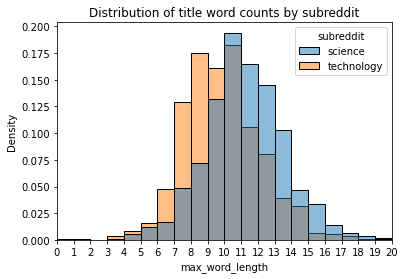

In [27]:
sns.histplot(data = df, x = 'max_word_length', hue = 'subreddit', 
             stat='density', common_norm = False, bins=np.arange(0,21)).set(
    title = 'Distribution of title word counts by subreddit', xlim = [0,20], 
    xticks = range(0,21));

In [28]:
df.corr()

,title_length,title_word_count,max_word_length,avg_word_length,subreddit_indicator
title_length,1.000000,0.965403,0.461224,0.211614,-0.283340
title_word_count,0.965403,1.000000,0.345098,0.010603,-0.212127
max_word_length,0.461224,0.345098,1.000000,0.620346,-0.214625
avg_word_length,0.211614,0.010603,0.620346,1.000000,-0.243823
subreddit_indicator,-0.283340,-0.212127,-0.214625,-0.243823,1.000000


Above we see that word length, character count, and word counts all have some correlation with the particular subredit, though the correlation is not strong.  However, from the density plots and the clear separation in likelihoods it is apparent that valuable information would likely be picked up from a tree-based classification model.  It is promising that the title statistics gathered thus far are not fully correlated with each other as this means they can provide non-redundant information to the modeling process.

I'll next look at word count frequencies

[Text(0.5, 1.0, '15 most common words word count -- technology')]

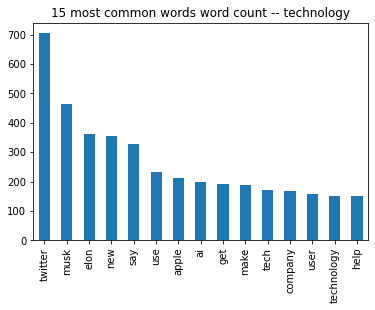

In [29]:
cv = CountVectorizer()
vectors = cv.fit_transform(df[df['subreddit']=='technology']['title'])
vectors.A
wc_vec = pd.DataFrame(vectors.A, columns = cv.get_feature_names_out())
wc_vec.sum().sort_values(ascending = False)[0:15].plot(kind = 'bar')\
.set(title = '15 most common words word count -- technology')

[Text(0.5, 1.0, '15 most common words word count -- science')]

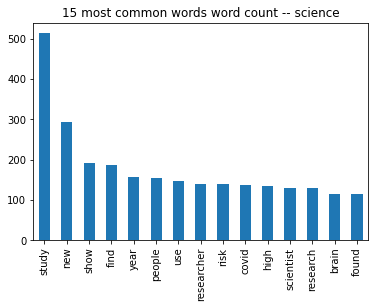

In [30]:
cv = CountVectorizer()
vectors = cv.fit_transform(df[df['subreddit']=='science']['title'])
vectors.A
wc_vec = pd.DataFrame(vectors.A, columns = cv.get_feature_names_out())
wc_vec.sum().sort_values(ascending = False)[0:15].plot(kind = 'bar')\
.set(title = '15 most common words word count -- science')

Above we see that there is not much overlap within the 15 most common words.  This indicates that there is a good chance that these common words will help with distinguishing between the subreddits.  Of note is that proper nouns seem to feature heavily in technology and almost not at all in science.

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [50]:
tfidf_vec = TfidfVectorizer(stop_words='english', max_features=1_000,
                             ngram_range=(1,2))
logreg = LogisticRegression(penalty='elasticnet', max_iter=10_000, \
                            random_state=1)

In [66]:
tfidf_lr_params = {"logreg__C": [.1,1,10],
                    "logreg__l1_ratio": [.1,.5,.9],
                   'tfidf_vec__max_df': [.9,.95,1.0],
                   'tfidf_vec__min_df': [1,3]}

In [63]:

tfidf_lr_pipe = Pipeline([
    ('tfidf_vec', tfidf_vect),
    ('logreg', LogisticRegression(penalty='none', max_iter=10_000, random_state=33))
])

In [64]:
gs_tfidf_lr = GridSearchCV(tfidf_lr_pipe,tfidf_lr_params)

In [67]:
gs_tfidf_lr.fit(df,y_train)

/Users/william/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/Users/william/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


ValueError: 
All the 270 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/william/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/william/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/william/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1138, in fit
    X, y = self._validate_data(
  File "/Users/william/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/william/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 1092, in check_X_y
    check_consistent_length(X, y)
  File "/Users/william/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 387, in check_consistent_length
    raise ValueError(
ValueError: Found input variables with inconsistent numbers of samples: [7, 5913]

--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/william/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/william/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/william/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1138, in fit
    X, y = self._validate_data(
  File "/Users/william/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/william/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 1092, in check_X_y
    check_consistent_length(X, y)
  File "/Users/william/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 387, in check_consistent_length
    raise ValueError(
ValueError: Found input variables with inconsistent numbers of samples: [7, 5914]

--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/william/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/william/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 378, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/william/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 336, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/william/opt/anaconda3/lib/python3.9/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/Users/william/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 870, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/Users/william/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 2079, in fit_transform
    X = super().fit_transform(raw_documents)
  File "/Users/william/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1355, in fit_transform
    X, self.stop_words_ = self._limit_features(
  File "/Users/william/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1187, in _limit_features
    raise ValueError(
ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/william/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/william/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 378, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/william/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 336, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/william/opt/anaconda3/lib/python3.9/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/Users/william/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 870, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/Users/william/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 2079, in fit_transform
    X = super().fit_transform(raw_documents)
  File "/Users/william/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1352, in fit_transform
    raise ValueError("max_df corresponds to < documents than min_df")
ValueError: max_df corresponds to < documents than min_df
